# Time Domain Analysis

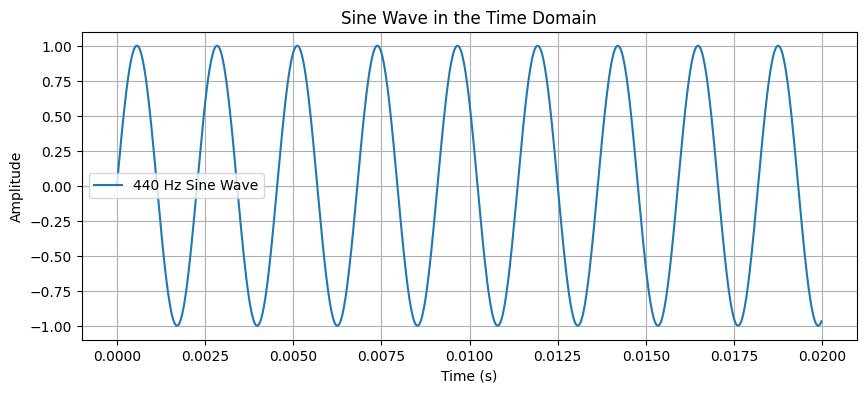

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 44100  # Sampling frequency
t = np.linspace(0, 0.02, int(fs * 0.02), endpoint=False)  # 20ms window
freq = 440  # Frequency in Hz
sine_wave = np.sin(2 * np.pi * freq * t)

plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave, label="440 Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave in the Time Domain")
plt.legend()
plt.grid()
plt.show()



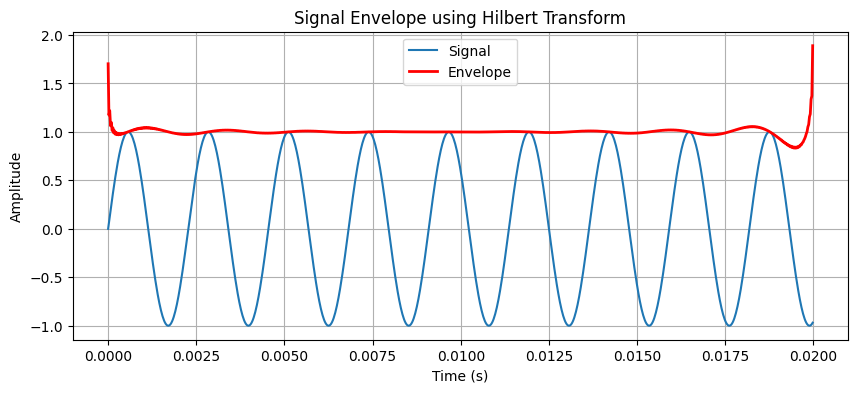

In [3]:
from scipy.signal import hilbert

analytic_signal = hilbert(sine_wave)
envelope = np.abs(analytic_signal)

plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave, label="Signal")
plt.plot(t, envelope, label="Envelope", linewidth=2, color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal Envelope using Hilbert Transform")
plt.legend()
plt.grid()
plt.show()


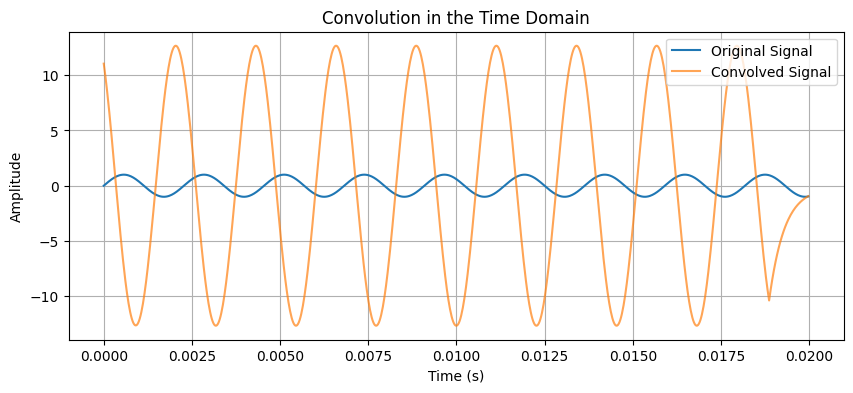

In [4]:
from scipy.signal import convolve

# Create a simple impulse response (e.g., exponential decay)
ir_length = 100  # Length of impulse response
impulse_response = np.exp(-np.linspace(0, 5, ir_length))

# Apply convolution
convolved_signal = convolve(sine_wave, impulse_response, mode='same')

plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave, label="Original Signal")
plt.plot(t, convolved_signal, label="Convolved Signal", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Convolution in the Time Domain")
plt.legend()
plt.grid()
plt.show()


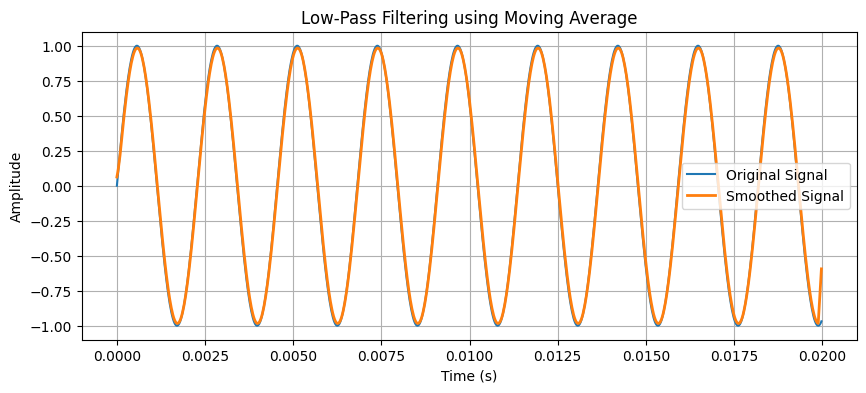

In [5]:
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

filtered_signal = moving_average(sine_wave, window_size=10)

plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave, label="Original Signal")
plt.plot(t, filtered_signal, label="Smoothed Signal", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Low-Pass Filtering using Moving Average")
plt.legend()
plt.grid()
plt.show()


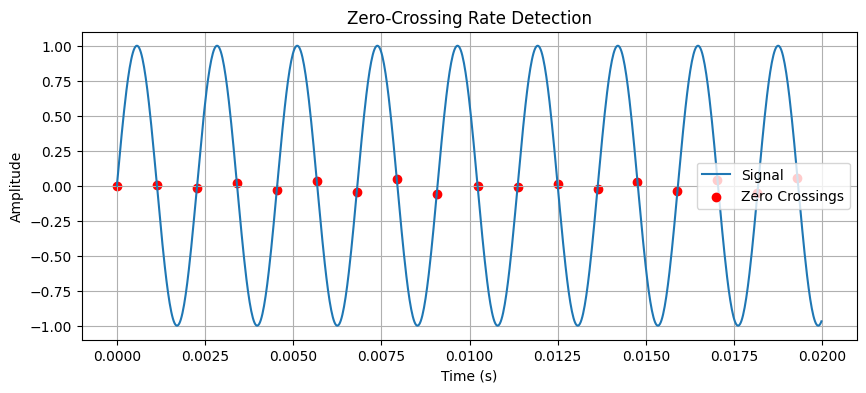

In [6]:
def zero_crossing_rate(signal):
    return np.where(np.diff(np.sign(signal)))[0]  # Find zero-crossings

zero_crossings = zero_crossing_rate(sine_wave)

plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave, label="Signal")
plt.scatter(t[zero_crossings], sine_wave[zero_crossings], color='red', label="Zero Crossings")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Zero-Crossing Rate Detection")
plt.legend()
plt.grid()
plt.show()
